In [19]:
import datetime
import time
from dateutil import parser
import pandas as pd

## Pregunta 1
Describe la diferencia entre: Time stamp, Time intervals, Time deltas. ¿Qué métodos y funciones tiene Pandas para trabajar con estos conceptos? Escribe ejemplos ilustrativos.


* *Time stamp:*  Es la representación de la cantidad de tiempo transcurrido desde la época (1 de enero de 1970 a las 00:00:00 UTC), y generalmente se expresa en segundos, aunque también puede estar en milisegundos, microsegundos o incluso en nanosegundos, dependiendo de la implementación y la necesidad de precisión.

In [ ]:
#el modulo time tiene la funcion time que nos da lo siguiente
print('El numero de segundos que ha pasado desde el 1 de enero de 1970 a las 00:00:00 es {}'.format(time.time()))

El numero de segundos que ha pasado desde el 1 de enero de 1970 a las 00:00:00 es 1701134182.1891382


* *Time intervals:* Parece que no existen, no encontre nada y menos como usarlos en pandas.

* *Time deltas*: Estos, en el caso de la libreria datetime, representan un transcurso de tiempo por ejemplo 5 segundos y sirven para despues sumarselos o restarselos a un objeto datetime y obtener lo que naturalmente esperamos, un nuevo datetime con el momento del datetime original menos 5 segundos.

In [ ]:
# creamos un datetime con el instante de tiempo actual y le restamos 11 minutos y 6 segundos
time = datetime.datetime.now()
delta = datetime.timedelta(seconds = 666)

#restamos y obtenemos lo esperado
time - delta

datetime.datetime(2023, 11, 28, 1, 36, 52, 361259)

Los timedalte los uso bastante ne mis trabajos porque las bases de datos (en su mayoria) estan indexadas por datatimes separados por 10 segundos de observacion en observacion y en lugar de calcular cuantos 10s equivalen al intervalo que necesito puedo usar los siguiente

In [4]:
ini = datetime.datetime(2023, 12, 1, 12, 30)
fin = ini + datetime.timedelta(hours = 4)
#y ya puedo usarlos con loc[ini:fin] para obtener la vista que necesito 

#de igual manera me toca usarlos para ver cuanto tiempo pasa entre observaciones 'especiales'
obs1 = datetime.datetime(2023, 12, 1, 12, 30)
obs2 = datetime.datetime(2023, 12, 12, 8, 10)
obs2 - obs1

datetime.timedelta(days=10, seconds=70800)

## Pregunta 2
Escribe ejemplos ilustrativos de la función datetime del módulo datetime, de la función parser del módulo dateutil y del método strftime de los objetos datetime.

### datetime
datetime.datetime es el constructor de la clase datime

In [ ]:
#ejemplo de uso
a = datetime.datetime(2023, 11, 12, 00,00)
#se usa para crear objetos tipo datetime que representan momentos a partir de la fecha, hora, minutos ...

datetime.datetime(2023, 11, 12, 0, 0)

### parse
La función parser del módulo dateutil en Python se utiliza para analizar cadenas de texto que representan fechas y horas y convertirlas en objetos datetime.

In [ ]:
#aqui usamos parse de parser para crear un datetime igual a 'a'
b = parser.parse('2023-11-12')
if a == b:
  print('son iguales')


son iguales


### strftime
strftime es un metodo de los objetos datetime que se usa para regresar un string que representa al objeto (regresa el momento en string pues).
A este metodo se la pasa un string que representa como quieres que represente el datetime.
En esta pagina casi al final se encuentran todos los codigos que se pueden usar.

In [ ]:
# EJemplo de uso
c = datetime.datetime(2023,12,1,00,59,59)
c.strftime('anio: %Y, mes: %m, dia: %d')

'anio: 2023, mes: 12, dia: 01'

In [ ]:
#otro ejemplo de uso
#No se suele usar claro, pero es solo para ver como funciona el metodo, remplaza los codigos por la info que tiene el datetime
c.strftime('%Y,%y,%m,%B')

'2023,23,12,December'

## Pregunta 3
Revisa los siguientes fragmentos de código y describe qué operaciones trabajan con tiempo y qué hacen estas operaciones.

Se descarga modulo yfinance

In [ ]:
!pip install yfinance

Se importa el modulo yfinance con el alis yf

In [9]:
import yfinance as yf

se descarga la base de datos GOOG con los datos del 2004-01-01 al 2016-01-01 y mostramos una vista de los datos.

In [10]:
goog = yf.download('GOOG', start = '2004-01-01', end='2016-01-01')
goog

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2015-12-24,37.477501,37.567501,37.331001,37.419998,37.419998,10544000
2015-12-28,37.646000,38.149502,37.476002,38.125500,38.125500,30306000
2015-12-29,38.334499,38.999001,38.321499,38.830002,38.830002,35300000


Muestra la columna de la variable Close, que por el contesto se entiende que es el precio de la accion al finalizar el dia

In [30]:
cprice = goog['Close']
cprice

Date
2004-08-19     2.499133
2004-08-20     2.697639
2004-08-23     2.724787
2004-08-24     2.611960
2004-08-25     2.640104
                ...    
2015-12-24    37.419998
2015-12-28    38.125500
2015-12-29    38.830002
2015-12-30    38.549999
2015-12-31    37.944000
Name: Close, Length: 2863, dtype: float64

Se importan los dos modulos y se pone el estilo de seabron

In [28]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set_theme()

Se grafica los precios de cierre

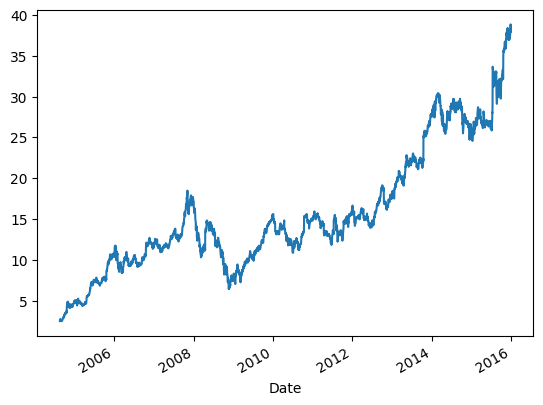

In [12]:
cprice.plot();

Aqui se hace un resample con frecuencia de año fiscal usando la media como funcion de agregación.
Un resample se parece a un groupby pero en lugar de agrupar por categorias se agrupa por intervalos de tiempo (de un datetime a un datetime, de un date a un date, etc), en este caso por año fiscal.
Agrupar por año fiscal es diferente a por año por lo que vemos abajo, aveces termina en el 31 y aveces no (si hay datos esos dias).

In [15]:
resampled = cprice.resample('BA').mean()
resampled

Date
2004-12-31     3.780860
2005-12-30     6.918047
2006-12-29    10.241246
2007-12-31    13.418465
2008-12-31    11.577904
2009-12-31    10.951161
2010-12-31    13.340574
2011-12-30    14.171237
2012-12-31    16.010401
2013-12-31    22.023519
2014-12-31    27.990164
2015-12-31    30.100284
2016-12-30          NaN
Freq: BA-DEC, Name: Close, dtype: float64

Aqui se usa el metodo asfreq, que también se usa para cambiar la frecuencia de una serie de tiempo y se usa la misma frecuenca que anteriormente. La diferencia es que se usa como representante para nueva frecuencia al ultimo valor del año.

La diferencia entre ambos es que con asfreq se selecciona un representande para la nueva frecuencia en lugar de usar una funcion de agregacion.
El representante si se deja vacio, como abajo, corresponde al valor de la serie original en ese tiempo, que podria ser un NaN si no hay ninguno o el ultimo valor del intervalo que corresponden a la nueva frecuencia.

In [26]:
freq = cprice.asfreq('BA')
freq

Date
2004-12-31     4.801752
2005-12-30    10.332770
2006-12-29    11.469011
2007-12-31    17.222446
2008-12-31     7.662529
2009-12-31    15.441621
2010-12-31    14.793799
2011-12-30    16.087200
2012-12-31    17.618462
2013-12-31    27.913124
2014-12-31    26.247936
2015-12-31    37.944000
Freq: BA-DEC, Name: Close, dtype: float64

Ahora se grafican la grafica original, la resampled y la freq.
Recordar que:
* en resample la agregacion se hace hacia atras, es decir, el valor en un tiempo t correspone al valor de la funcion de agregacion en el intervalo (t - algo, n) de tiempo.
* Aplica lo mismo para asfreq, el representante es el ultimo del intervalo

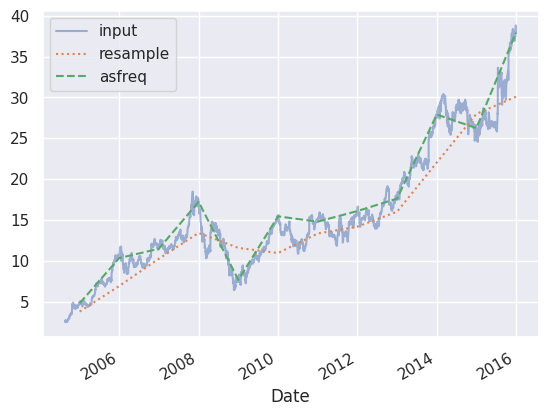

In [29]:
cprice.plot(alpha=0.5, style='-')
resampled.plot(style=':')
freq.plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

* Se usa el metodo rolling para hacer ventaneos del cprice. Se toma un 'intervalo' de 365 datos sin hacer una funcion de agregacion asi que regresa solamente el objeto  (pandas.api.typing.Window). Ademas se especifica que el intervalo va a ser centrado, es decir, la funcion de agregacion (que se usará después) en el renglon n representa el intervalo de datos del renglon n - 365 / 2 al n + 365/2 (pandas decide a donde se va el dato impar).
* Se grafica el cprice, la media centrada (anteriormente no era centrada) del cprice y la desviacion estandar centrada del cprice.
* Se usan distintos estilos y se pone un alpha menor a 1 para que la primera curva dibujada tenga trasnparencia.

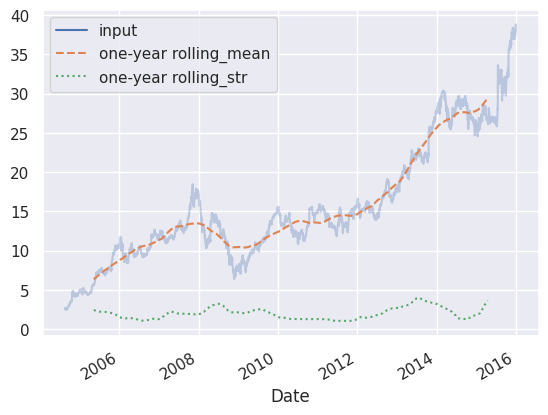

In [31]:
rolling = cprice.rolling(365, center=True)
data = pd.DataFrame({
    'input': cprice,
    'one-year rolling_mean': rolling.mean(),
    'one-year rolling_str': rolling.std(),
})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3);